# Terras Indígenas na Amazônia Legal Brasileira

## 0. Importações

### 0.1. Bibliotecas

In [1]:
# Data manipulation libraries
import pandas               as pd
import numpy                as np
import geopandas            as gpd

# Visualization libraries
import seaborn              as sns
import matplotlib           as mpl
import matplotlib.pyplot    as plt
import matplotlib.patches   as mpatches

# Other
import requests             as req 
import warnings
import sys
import os

### 0.2. Configurações

In [2]:
# Ignorar avisos
warnings.filterwarnings('ignore')

# Configurando Pandas
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', None)

# Configuração
%matplotlib inline

# Estilo
mpl.style.use('ggplot')  

# rcParams
mpl.rcParams.update({
    'axes.titlesize': 24,
    'axes.labelsize': 16,
    'axes.facecolor': 'white',
    'axes.linewidth': 1,
    'axes.grid': True,
    'xtick.labelsize': 16,
    'xtick.bottom': False,
    'ytick.labelsize': 16,
    'ytick.left': False,
    'legend.fontsize': 16,
    'lines.linewidth': 2,
    'lines.markersize': 6,
    'grid.color': 'lightgray',
    'grid.linestyle': '-',
    'grid.linewidth': 0.5,
    'font.size': 16,
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial'],
    'figure.titlesize': 24,
    'figure.figsize': (16,8),
    'figure.dpi': 150
})

### 0.3. Dados

In [3]:
# Terras Indígenas
url_ti  = 'https://geoserver.funai.gov.br/geoserver/Funai/ows?service=WFS&version=1.0.0&request=GetFeature&typeName=Funai%3Atis_amazonia_legal_poligonais&maxFeatures=10000&outputFormat=application%2Fjson'

# GeoDataFrame Terras Indígenas
gdf_ti = gpd.read_file(url_ti)

In [4]:
# Municípios Brasileiros
url_mun = ('https://servicodados.ibge.gov.br/api/v3/malhas/paises/BR?formato=application/vnd.geo+json&qualidade=maxima&intrarregiao=municipio')

# Importação dos dados
request_mun = req.get(url_mun).json()

# GeoDataFrame
gdf_mun = gpd.GeoDataFrame.from_features(request_mun)

# Ajuste
gdf_mun['codarea'] = gdf_mun['codarea'].astype('int64')

In [5]:
# Municípios Amazônia Legal
url_alb = 'https://geoftp.ibge.gov.br/organizacao_do_territorio/estrutura_territorial/amazonia_legal/2022/Municipios_da_Amazonia_Legal_2022.xlsx'

# DataFrame
df_alb = pd.read_excel(url_alb)[['CD_MUN', 'CD_UF', 'NM_MUN']]

# Lista de municípios
list_alb = df_alb['CD_MUN'].to_list()

## 1. Manipulação dos Dados

In [7]:
# Filtrando municípios para apenas ALB
gdf_mun_alb = gdf_mun[gdf_mun['codarea'].isin(list_alb)]

# Ajustes
gdf_mun_alb = pd.merge(gdf_mun_alb, df_alb[['CD_MUN', 'CD_UF']], left_on='codarea', right_on='CD_MUN', how='left')
gdf_mun_alb = gdf_mun_alb[['geometry', 'CD_UF', 'CD_MUN']]

In [8]:
# Filtros dummy
gdf_ti['ti'] = 1
gdf_mun_alb['ti'] = 0

In [9]:
# Dados completos
gdf_full = np.concatenate([gdf_ti[['geometry', 'ti']], gdf_mun_alb[['geometry', 'ti']]], axis=0)

# GeoDataFrame
gdf_full = gpd.GeoDataFrame(gdf_full, columns=['geometry', 'ti'])

## 2. Visualização dos Dados

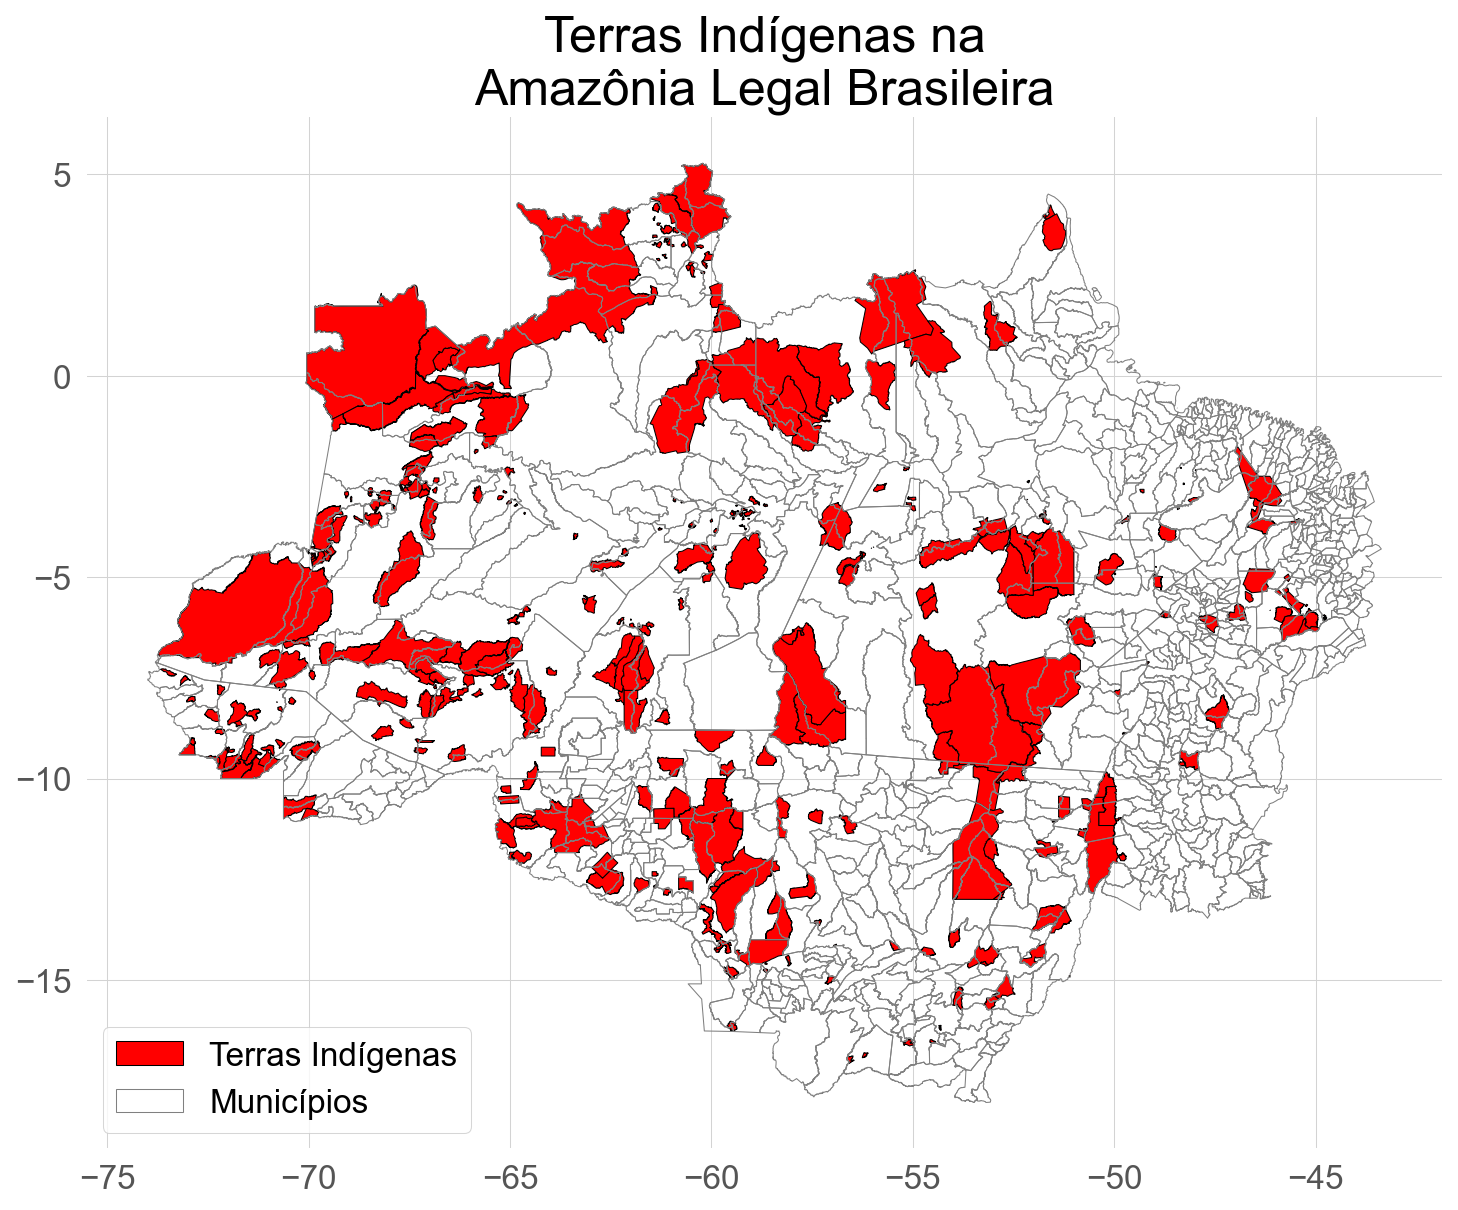

In [10]:
# Filtros
gdf_1 = gdf_full[gdf_full['ti'] == 1]
gdf_0 = gdf_full[gdf_full['ti'] == 0]

# Figura
fig, ax = plt.subplots(figsize=(10, 10))

# Plot 1
gdf_1.plot(ax=ax, edgecolor='black', facecolor='red')

# Plot 2
gdf_0.plot(ax=ax, edgecolor='gray', facecolor='none')

# Patches
black_patch = mpatches.Patch(edgecolor='black', facecolor='red', label='Terras Indígenas')
gray_patch  = mpatches.Patch(edgecolor='gray', facecolor='none', label='Municípios')

# Legenda
plt.legend(handles=[black_patch, gray_patch], loc='lower left')

# Título
plt.title('Terras Indígenas na\nAmazônia Legal Brasileira', loc='center')

# Ajuste
plt.tight_layout()